In [1]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# ---------------------------- Importando os dados --------------------------- #
dfConc = pd.read_csv('dados/Conc/C-Num=300.csv', header=None)

dfConc

,0,1,2
0,0,300,0
1,1,298,1
2,2,298,1
3,3,298,1
4,4,298,1
...,...,...,...
6121,6121,4,148
6122,6122,4,148
6123,6123,4,148
6124,6124,4,148


In [3]:
# ------------------------- Igualando as porcentagens ------------------------ #
eixo_x = np.array(dfConc[0], dtype=np.float128) * 1e-4

eixo_y1 = np.array(dfConc[1], dtype=np.float128)
eixo_y2 = np.array(dfConc[2], dtype=np.float128)

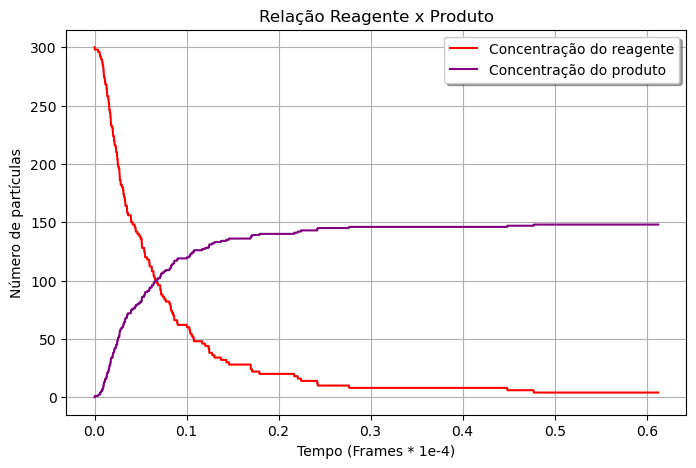

In [4]:
# ---------------------- Plotando os dados da simulação ---------------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Número de partículas')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente', color='red')
plt.plot(eixo_x, eixo_y2, label='Concentração do produto', color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [5]:
# ----------------------- Fitando a função do reagente ----------------------- #
def funcReag(x, a, b):
    return a * np.exp(-b * x)

params1, _ = optimize.curve_fit(funcReag, eixo_x, eixo_y1)

print("Parâmetros otimizados:", params1)

Parâmetros otimizados: [310.09039645  16.33976516]


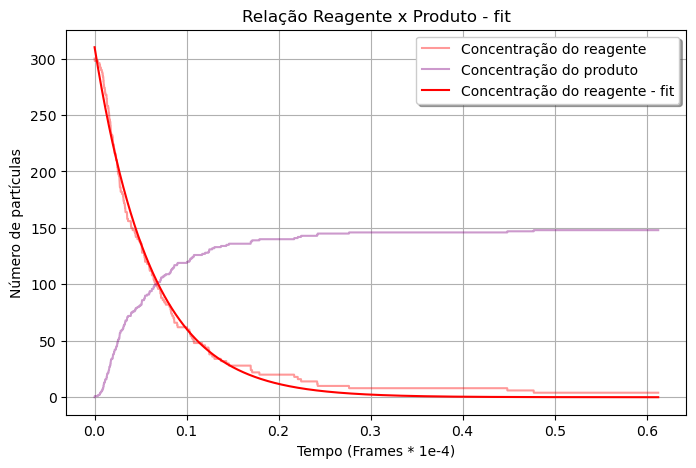

In [6]:
# --------------- Plotando interpolação dos dados da simulação --------------- #
fit_y1 = funcReag(eixo_x, *params1)

plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto - fit')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Número de partículas')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente', color='red', alpha=.4)
plt.plot(eixo_x, eixo_y2, label='Concentração do produto', color='purple', alpha=.4)

plt.plot(eixo_x, fit_y1, label="Concentração do reagente - fit", color='red')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

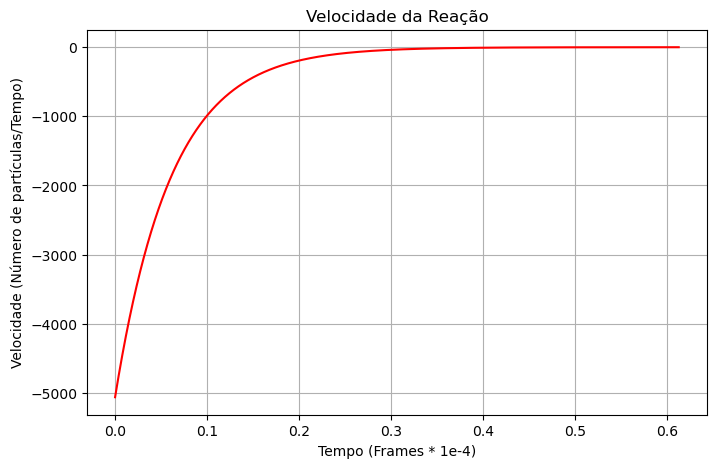

In [7]:
# ---------------------- Plotando a velocidade da reação --------------------- #
velocidade = np.diff(fit_y1)/np.diff(eixo_x)


plt.figure(figsize=(8,5))

plt.title('Velocidade da Reação')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Velocidade (Número de partículas/Tempo)')

plt.plot(eixo_x[:-1], velocidade, color='red')

plt.grid()
plt.show() 

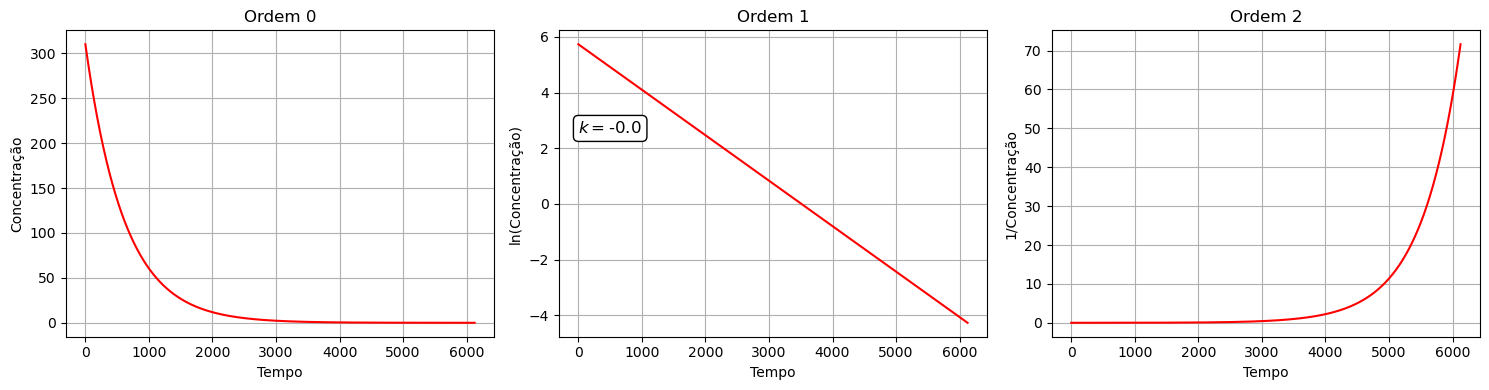

In [8]:
# ------- Analisando os três gráficos para determinar a ordem de reação ------ #
ordem0 = fit_y1
ordem1 = np.log(fit_y1)
ordem2 = 1/fit_y1
eixo_x = eixo_x * 1e4

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].set_title('Ordem 0')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Concentração')
axes[0].grid()
axes[0].set_aspect('auto')

axes[0].plot(eixo_x, ordem0, 'r')

axes[1].set_title('Ordem 1')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('ln(Concentração)')
axes[1].grid()

axes[1].plot(eixo_x, ordem1, 'r')

axes[2].set_title('Ordem 2')
axes[2].set_xlabel('Tempo')
axes[2].set_ylabel('1/Concentração')
axes[2].grid()

axes[2].plot(eixo_x, ordem2, 'r')

# Escrevendo a constante k:
slope = (ordem1[100]-ordem1[99]) / (eixo_x[100]-eixo_x[99])
axes[1].text(1.5, 3, f"$k=${round(slope,2)}", fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

fig.tight_layout()

plt.show()